In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download


In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind = "zip", replace=True)
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')


file_sizes: 7.96MB [00:04, 1.64MB/s]                                            
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [4]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %M')

In [7]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True)

C:\Users\fajlh\AppData\Local\Temp\ipykernel_13468\2807138142.py:1: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True)
C:\Users\fajlh\AppData\Local\Temp\ipykernel_13468\2807138142.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True)
C:\Users\fajlh\AppData\Local\Temp\ipykernel_13468\2807138142.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be

In [8]:
aq_df.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 00:01:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 00:02:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 00:03:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 00:04:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [9]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [10]:
aq_df['month'] = pd.to_numeric(aq_df['month'])

In [11]:
print("Rows    : ", aq_df.shape[0])
print("Columns    : ", aq_df.shape[1])
print("\nFeatures  : \n", aq_df.columns.tolist())
print("\nMissing values   :  ", aq_df.isnull().any())
print("\nUnique values  : \n", aq_df.nunique())

Rows    :  35064
Columns    :  19

Features  : 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values   :   year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique values  : 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5     

In [12]:
aq_df.describe()

year_month_day_hour            No         month  \
count                          35064  35064.000000  35064.000000   
mean   2015-03-01 00:11:29.999999744  17532.500000      6.522930   
min              2013-03-01 00:00:00      1.000000      1.000000   
25%              2014-03-01 00:05:45   8766.750000      4.000000   
50%              2015-03-01 00:11:30  17532.500000      7.000000   
75%              2016-02-29 00:17:15  26298.250000     10.000000   
max              2017-02-28 00:23:00  35064.000000     12.000000   
std                              NaN  10122.249256      3.448752   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   
std       72.267723     79.541685     15.519259     26.383882    903.306220   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   
std       53.764424     11.365313     10.225664     13.822099      0.752899   

               WSPM  
count  35021.000000  
mean       1.853836  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000  
std        1.309808

In [13]:
aq_df_non_indexed = aq_df.copy()
aq_df = aq_df.set_index("year_month_day_hour")

In [14]:
aq_df.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 00:01:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 00:02:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 00:03:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 00:04:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 00:01:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 00:02:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 00:03:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 00:04:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [15]:
aq_df.loc['2013':'2015']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2013-03-01 00:00:00      1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 00:01:00      2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 00:02:00      3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 00:03:00      4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 00:04:00      5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 00:19:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 00:20:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 00:21:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 00:22:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 00:23:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 00:01:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 00:02:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 00:03:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 00:04:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 00:19:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 00:20:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 00:21:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 00:22:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 00:23:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 00:01:00  Dingling  
2013-03-01 00:02:00  Dingling  
2013-03-01 00:03:00  Dingling  
2013-03-01 00:04:00  Dingling  
...                       ...  
2015-12-31 00:19:00  Dingling  
2015-12-31 00:20:00  Dingling  
2015-12-31 00:21:00  Dingling  
2015-12-31 00:22:00  Dingling  
2015-12-31 00:23:00  Dingling  

[24864 rows x 18 columns]

In [16]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 00:01:00    7.0
2013-03-01 00:02:00    5.0
2013-03-01 00:03:00    6.0
2013-03-01 00:04:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='year_month_day_hour'>

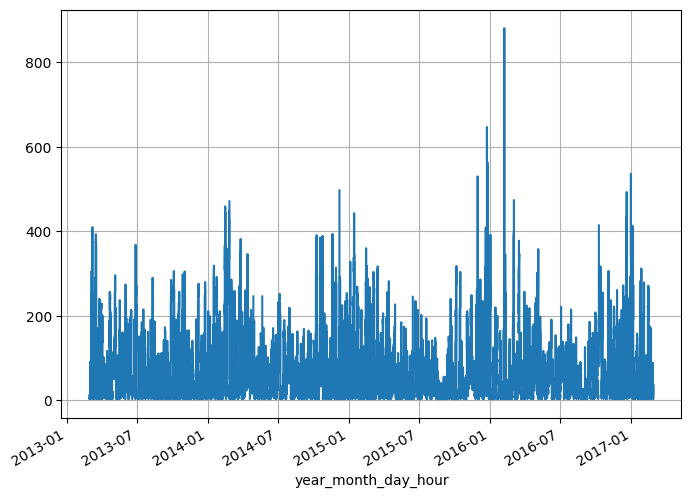

In [17]:
pm_data.plot(grid = True)

<Axes: xlabel='year_month_day_hour'>

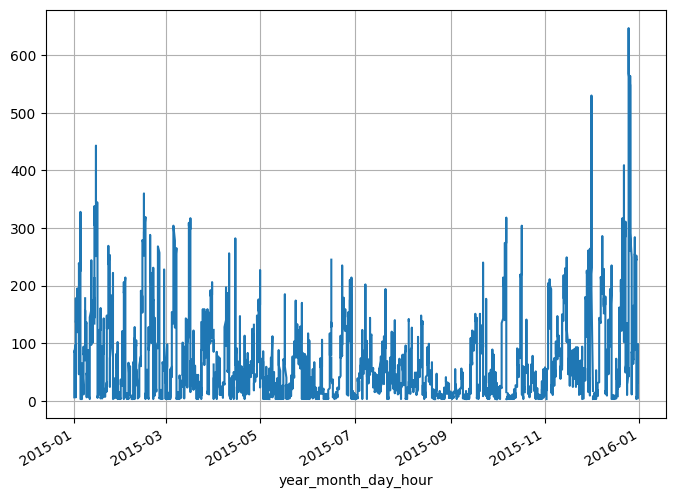

In [18]:
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015['PM2.5']
pm_data_2015.plot(grid = True)

<Axes: xlabel='year_month_day_hour'>

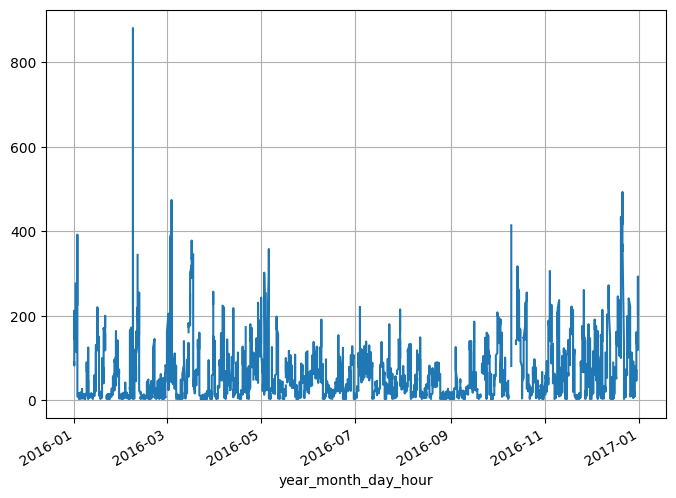

In [19]:
aq_df_2016 = aq_df.loc['2016']
pm_data_2016 = aq_df_2016['PM2.5']
pm_data_2016.plot(grid = True)

In [20]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x = 'year_month_day_hour', y = 'PM2.5', title = 'PM2.5 with Slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [21]:
fig = px.line(aq_df_non_indexed, x = 'year_month_day_hour', y = 'PM2.5', title = 'PM2.5 with Slider')
fig.update_xaxes(
	rangeslider_visible = True,
	rangeselector=dict(
		buttons=list([
			dict(count = 1, label = "ly", step = "year", stepmode="backward"),
			dict(count = 2, label = "2y", step = "year", stepmode = "backward"),
			dict(count = 3, label = "3y", step = "year", stepmode = "backward"),
			dict(step = "all")
		])
	)
)
fig.show()

Text(0.5, 1.0, 'Air Quality plot for the year 2014 and 2015')

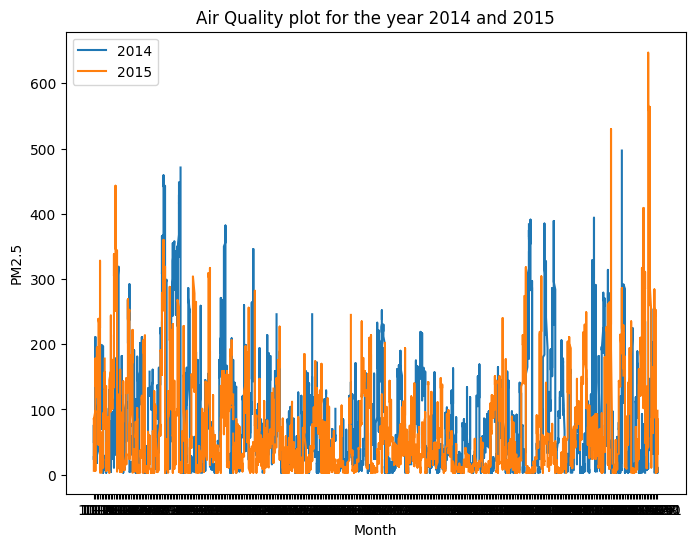

In [29]:
df_2014 = aq_df.loc['2014'].reset_index()
df_2015 = aq_df.loc['2015'].reset_index()
df_2014['month_day_hour'] = df_2014.apply(lambda x : str(x['month']) + " - " + x['day'], axis = 1)
df_2015['month_day_hour'] = df_2015.apply(lambda x : str(x['month']) + " - " + x['day'], axis = 1)
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.legend(['2014', '2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2014 and 2015')

In [30]:
aq_df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [31]:
aq_df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

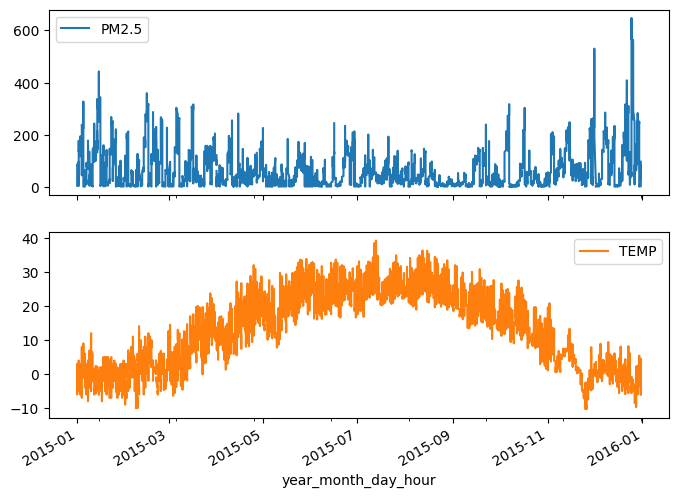

In [32]:
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots = True)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>]], dtype=object)

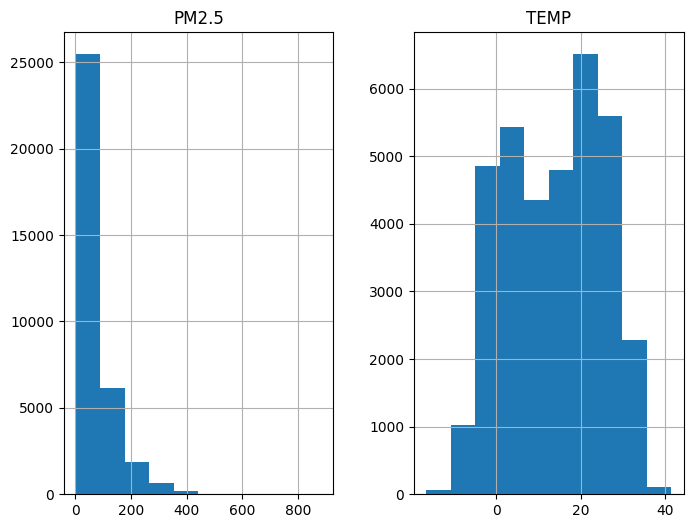

In [33]:
aq_df[['PM2.5', 'TEMP']].hist()

<Axes: ylabel='Density'>

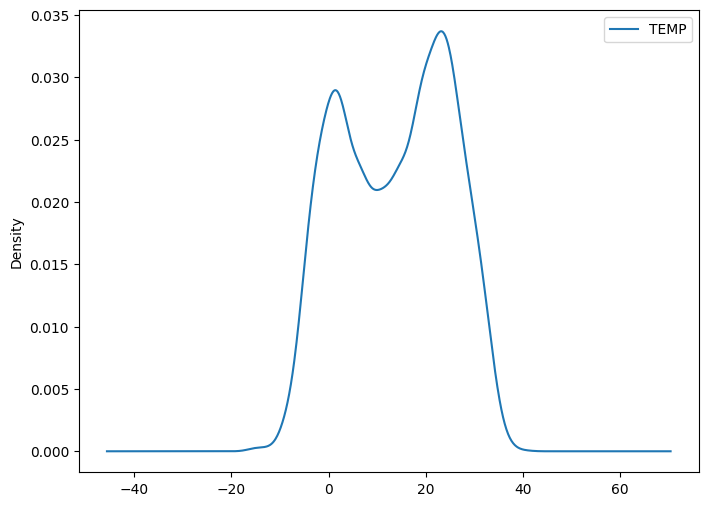

In [36]:
aq_df[['TEMP']].plot(kind = 'density')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

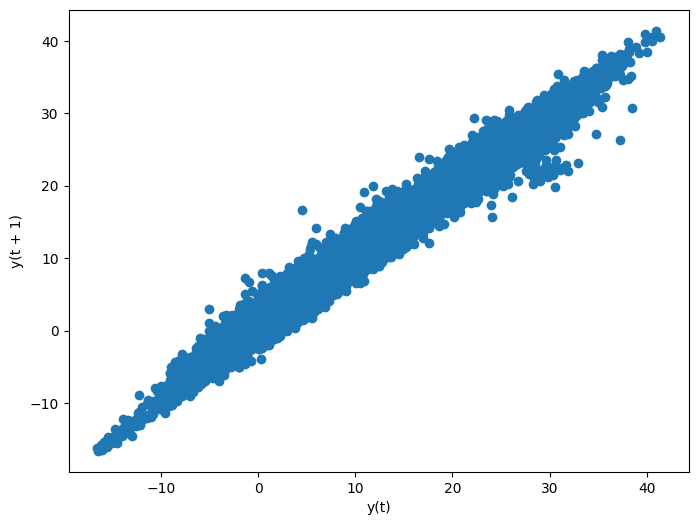

In [37]:
# It helps with autocorrelation. x-axis is the current time, y-axis is the lag of time. n-order lag plot.
# In this case data is hourly so it's a correlation between this time and an hour ago.
# There is very linear relationship between the times. So there is big relationship between what temperature is not based on the temperature an hour ago.
pd.plotting.lag_plot(aq_df['TEMP'], lag = 1)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

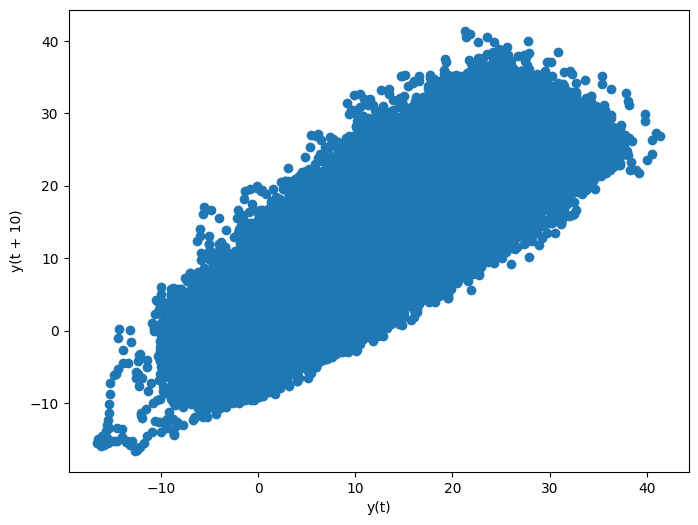

In [38]:
# There is change in variation. So the temperature 10 hour ago is not so linear to temperature is now
pd.plotting.lag_plot(aq_df['TEMP'], lag = 10)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

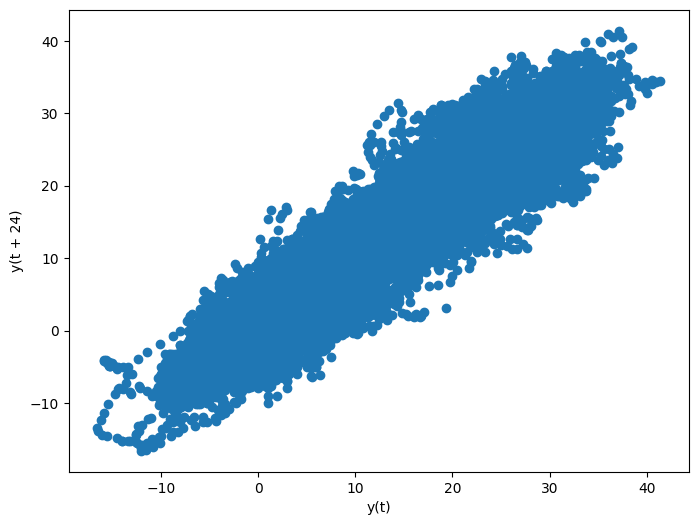

In [39]:
pd.plotting.lag_plot(aq_df['TEMP'], lag = 24)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

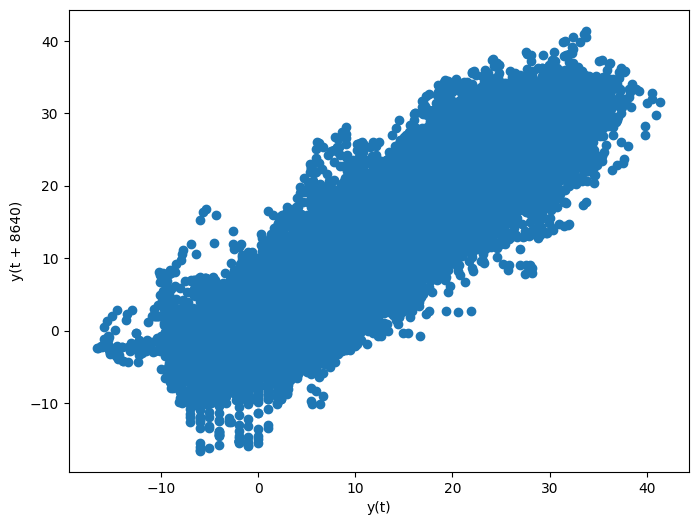

In [40]:
# This shows the correlation of temperature now vs temperature a year ago
pd.plotting.lag_plot(aq_df['TEMP'], lag = 8640)

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

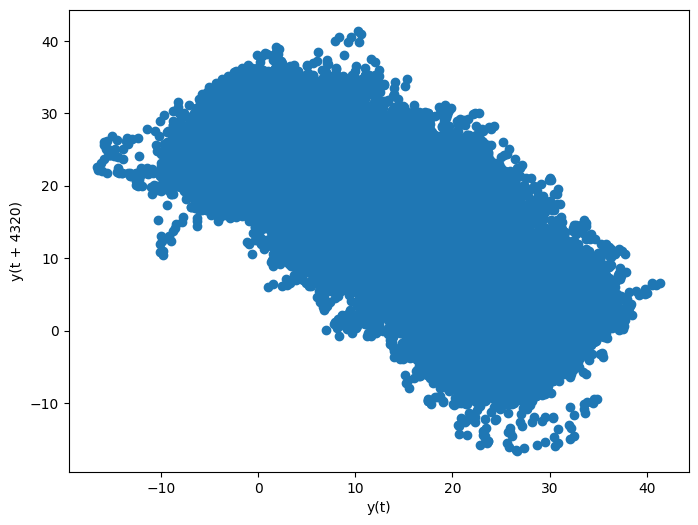

In [41]:
# temperature between now and half a year ago, so winter to summer, spring to winter. That's why we see inverse correlation
pd.plotting.lag_plot(aq_df['TEMP'], lag = 4320)

<Axes: xlabel='y(t)', ylabel='y(t + 2150)'>

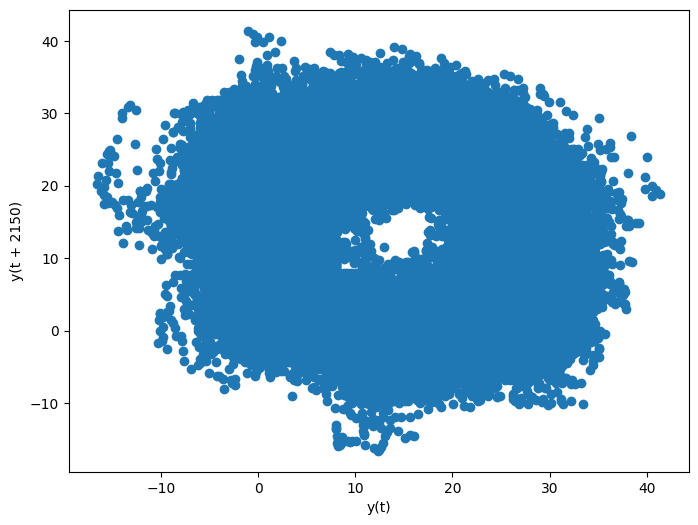

In [42]:
# And this compares temperature quarterly, 3 months.
# We do not expect correlation.
pd.plotting.lag_plot(aq_df['TEMP'], lag = 2150)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

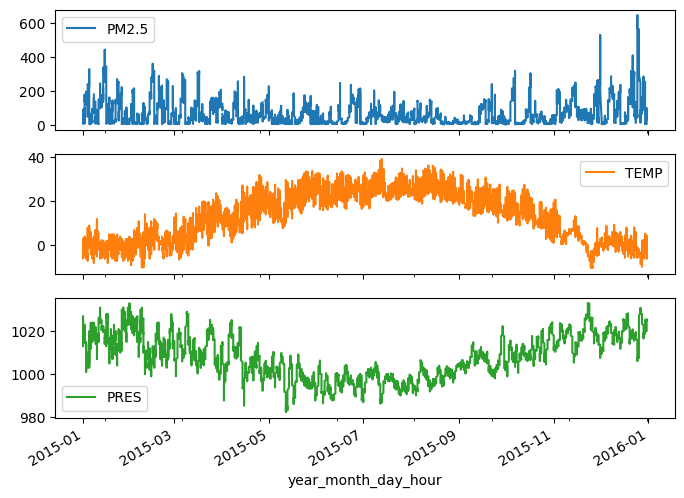

In [43]:
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots = True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

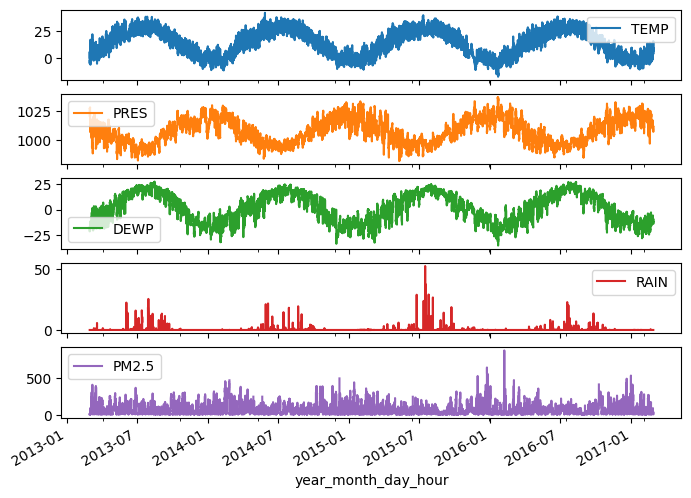

In [44]:
multi_data = aq_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']]
multi_data.plot(subplots = True)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

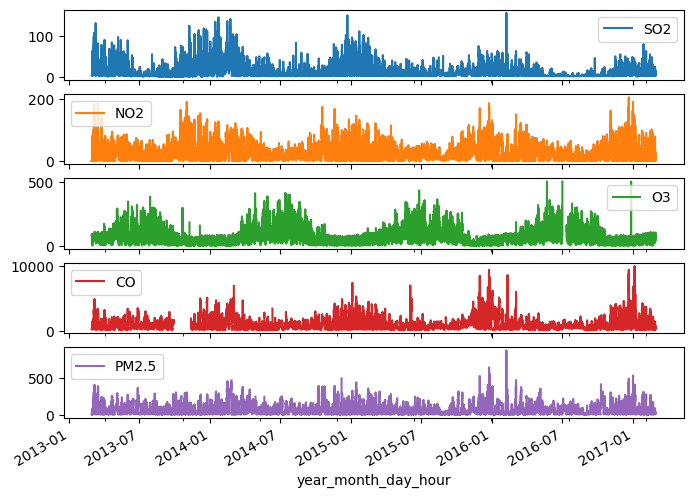

In [45]:
multi_data = aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']]
multi_data.plot(subplots = True)

Text(0.5, 0, 'year_month_day_hour')

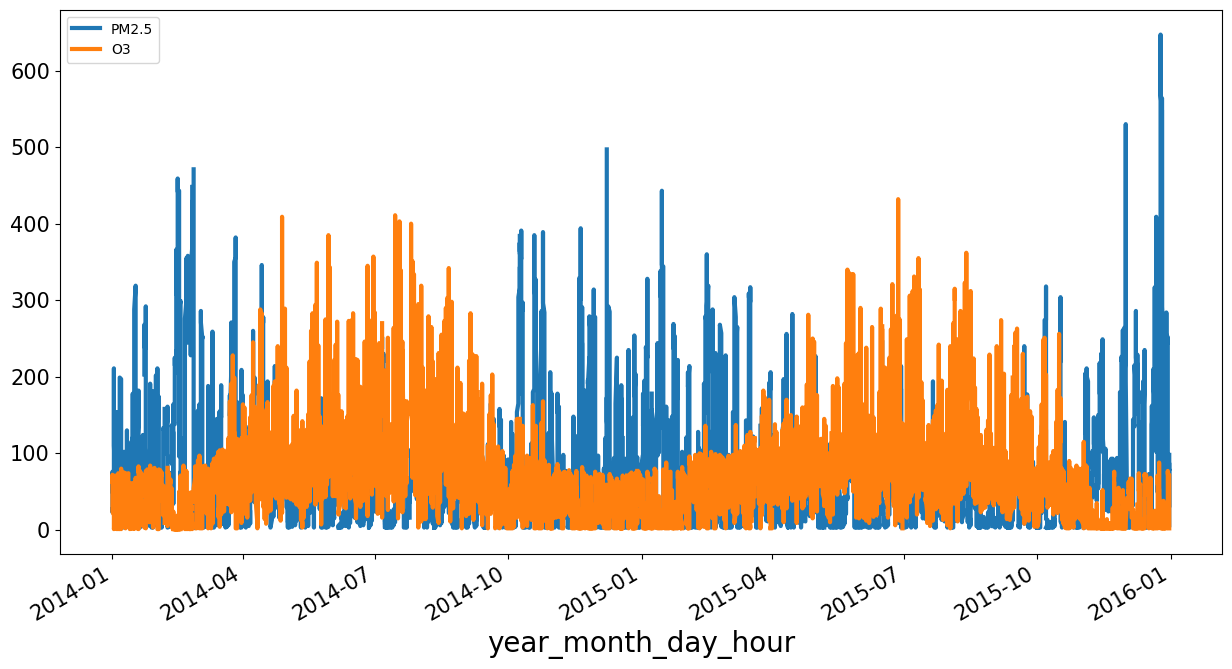

In [46]:
aq_df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20)

In [48]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

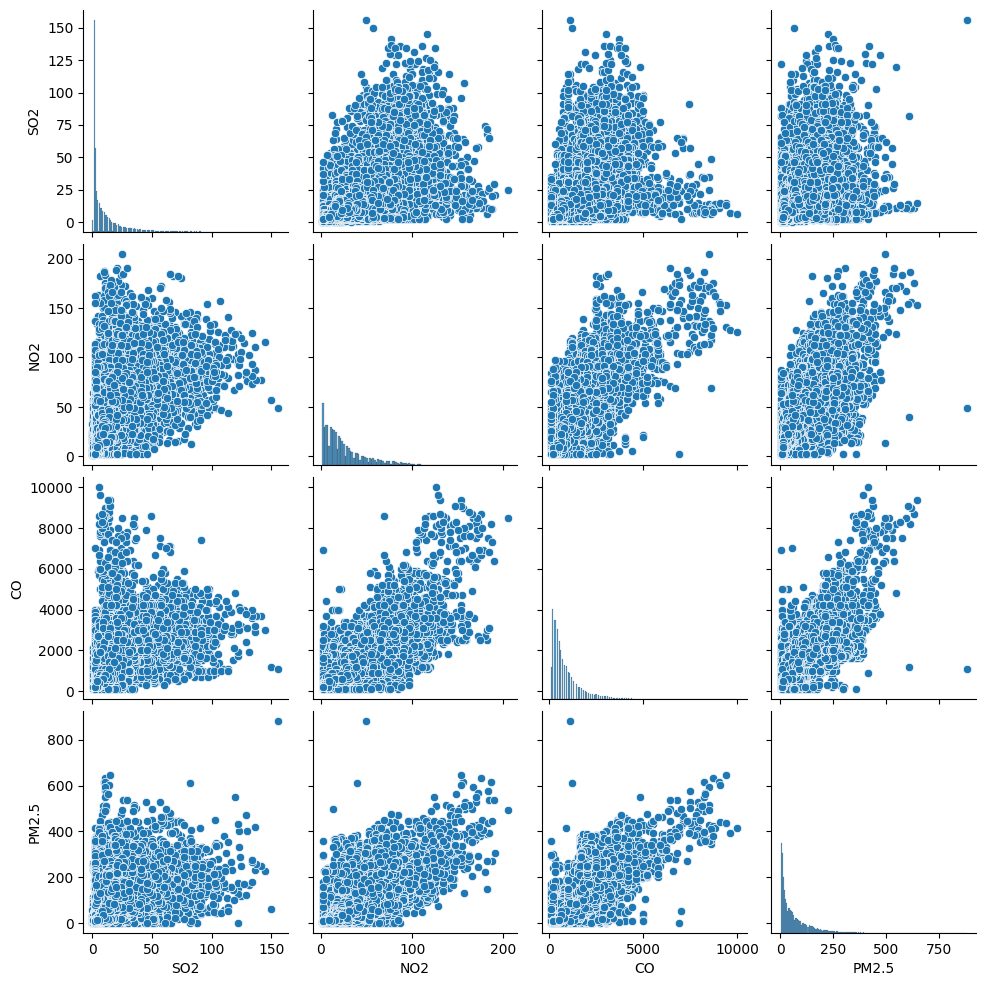

In [51]:
g = sns.pairplot(aq_df[['SO2', 'NO2', 'CO', 'PM2.5']])

In [52]:
aq_corr = aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method = 'pearson')

In [53]:
aq_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

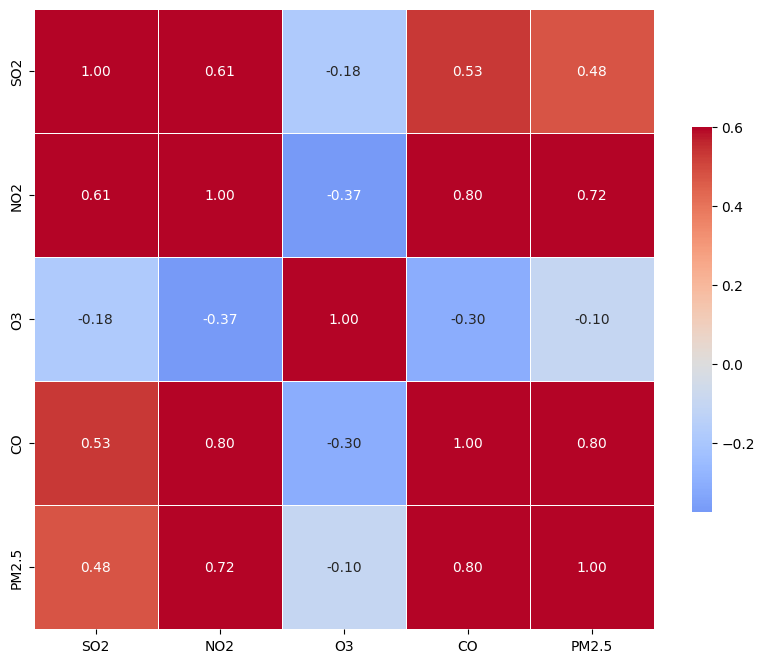

In [57]:
g = sns.heatmap(aq_corr, vmax=.6, center = 0, square = True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True, fmt='.2f', cmap="coolwarm")
g.figure.set_size_inches(10, 10)
plt.show()

In [58]:
aq_df.groupby('wd').agg(median = ('PM2.5', 'median'),
						mean = ('PM2.5', 'mean'),
						max = ('PM2.5', 'max'),
						min = ('PM2.5', 'min')).reset_index()

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

In [59]:
aq_df_no = aq_df.dropna().copy()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

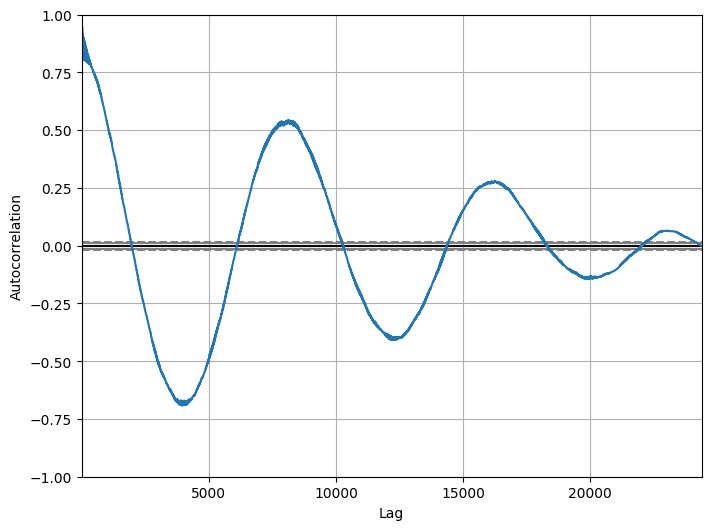

In [60]:
# Measures the lag value of the autocorrelation series
pd.plotting.autocorrelation_plot(aq_df_no['2014':'2016']['TEMP'])

In [62]:
aq_df_no['TEMP'].resample("me").mean()

C:\Users\fajlh\AppData\Local\Temp\ipykernel_13468\585349816.py:1: FutureWarning:

'me' is deprecated and will be removed in a future version, please use 'ME' instead.



year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

C:\Users\fajlh\AppData\Local\Temp\ipykernel_13468\225530888.py:1: FutureWarning:

'me' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

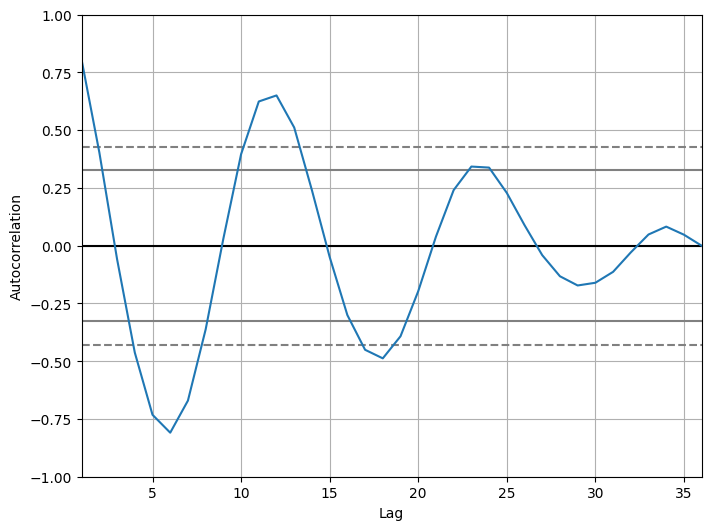

In [64]:
pd.plotting.autocorrelation_plot(aq_df_no['2014':'2016']['TEMP'].resample("me").mean())

C:\Users\fajlh\AppData\Local\Temp\ipykernel_13468\3058928037.py:1: FutureWarning:

'me' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

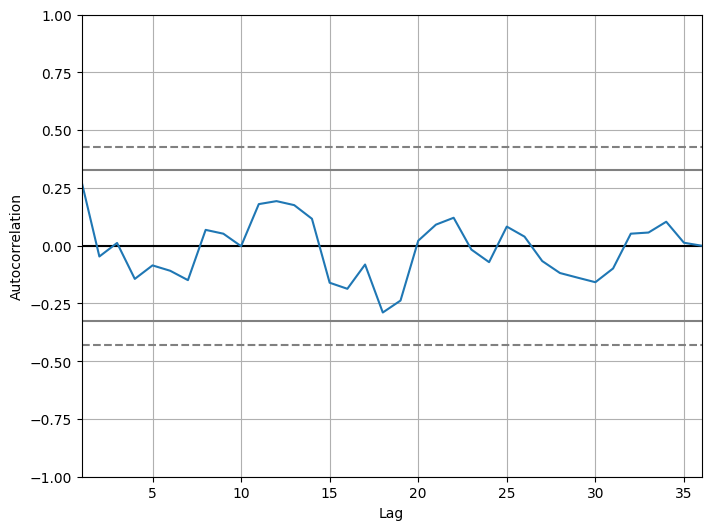

In [65]:
pd.plotting.autocorrelation_plot(aq_df_no['2014':'2016']['PM2.5'].resample("me").mean())